# 이진분류 (binary classification)
- 당뇨병 데이터셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [3]:
diabets = pd.read_csv('/content/diabetes.csv')
df = diabets
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
Ins_mean = df.loc[df['Insulin'] != 0,'Insulin'].mean()
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df = df.fillna(Ins_mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,0
2,8,183,64,0,155.548223,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,155.548223,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,155.548223,30.1,0.349,47,1


In [7]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2022)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values

### 모델

In [10]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(8,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________


In [12]:
# metrics에는 내가 보고싶은거 recall accuracy 등등

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
EPOCHS = 500
BATCH_SIZE = 32
history = model.fit(X_train,y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split = 0.2,
          verbose=1)

Epoch 1/500
16/16 [==============================] - 2s 29ms/step - loss: 0.6510 - accuracy: 0.6436 - val_loss: 0.5968 - val_accuracy: 0.7561
Epoch 2/500
16/16 [==============================] - 0s 7ms/step - loss: 0.5770 - accuracy: 0.7332 - val_loss: 0.5308 - val_accuracy: 0.7967
Epoch 3/500
16/16 [==============================] - 0s 8ms/step - loss: 0.5299 - accuracy: 0.7515 - val_loss: 0.4854 - val_accuracy: 0.8130
Epoch 4/500
16/16 [==============================] - 0s 11ms/step - loss: 0.4992 - accuracy: 0.7658 - val_loss: 0.4657 - val_accuracy: 0.7886
Epoch 5/500
16/16 [==============================] - 0s 11ms/step - loss: 0.4794 - accuracy: 0.7780 - val_loss: 0.4571 - val_accuracy: 0.7967
Epoch 6/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4667 - accuracy: 0.7841 - val_loss: 0.4502 - val_accuracy: 0.7805
Epoch 7/500
16/16 [==============================] - 0s 8ms/step - loss: 0.4564 - accuracy: 0.7943 - val_loss: 0.4480 - val_accuracy: 0.7967
Epoch 8/50

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

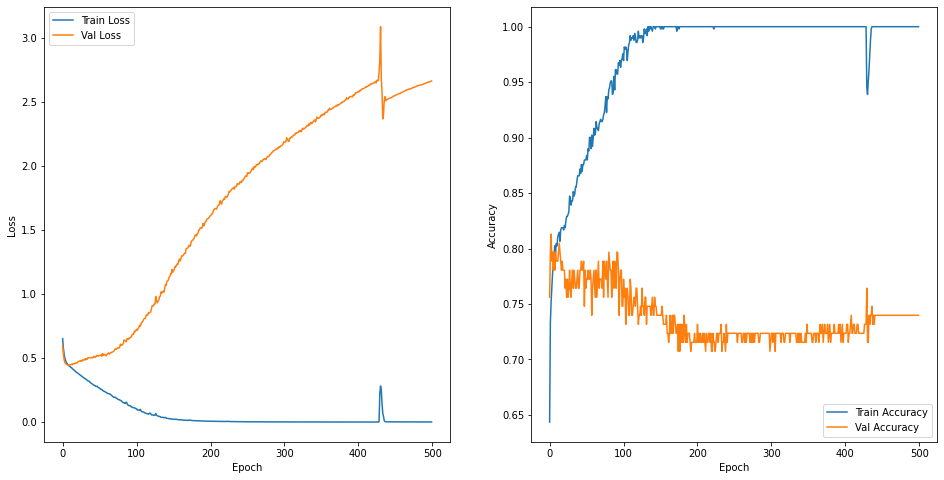

In [16]:
plot_history(history)

In [17]:
X_test = scaler.transform(X_test)
y_test = y_test.values

In [18]:
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[1.13351399e-03],
       [9.97871280e-01],
       [9.63371813e-01],
       [4.86478469e-10],
       [2.23525331e-05],
       [6.23804723e-08],
       [9.98963475e-01],
       [7.64488542e-11],
       [2.87342817e-01],
       [1.30861117e-08],
       [8.81817357e-08],
       [1.23459809e-02],
       [9.96622205e-01],
       [1.29326082e-17],
       [7.38194063e-02],
       [9.35963631e-01],
       [7.45295736e-09],
       [4.86428219e-14],
       [8.26273549e-07],
       [9.97791648e-01],
       [6.44815862e-01],
       [1.97933314e-08],
       [9.99984026e-01],
       [1.37630489e-12],
       [1.64526945e-03],
       [5.93477523e-07],
       [3.60325771e-07],
       [5.72387908e-25],
       [8.34589116e-07],
       [9.99999166e-01],
       [1.15247417e-06],
       [2.19264693e-04],
       [3.10435239e-03],
       [1.38209525e-05],
       [1.06556219e-09],
       [9.14563119e-01],
       [4.33998295e-08],
       [9.99940276e-01],
       [2.90030657e-05],
       [1.22021675e-06],


In [19]:
model.evaluate(X_train,y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.9479


[0.5335808992385864, 0.9478827118873596]

In [23]:
y_pred = model.predict(X_test)
y_test

5/5 [==============================] - 0s 4ms/step


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [22]:
y_pred = y_pred.flatten()
y_pred = (y_pred>0.5).astype('int')
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrixs import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test,y_pred)

ModuleNotFoundError: ignored